In [1]:
# Importing dependencies
import psycopg2
import getpass
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Connect to the database
server_pass = getpass.getpass('Enter database password: ')
engine = psycopg2.connect(
    database="postgres",
    user="group_4",
    password=server_pass,
    host="capstone-project.c9uk6piofxnr.us-east-2.rds.amazonaws.com",
    port='5432'
)

Enter database password: ··········


In [3]:
# Importing the data from the databse 
sql = "select * from placement_predictions;"
student_records_df = pd.read_sql_query(sql, engine)
student_records_df.head()

,id,age,gender,stream,internships,cgpa,hostel,historyofbacklogs,placedornot
0,1,22,Male,Electronics And Communication,1,8,1,1,1
1,2,21,Female,Computer Science,0,7,1,1,1
2,3,22,Female,Information Technology,1,6,0,0,1
3,4,21,Male,Information Technology,0,8,0,1,1
4,5,22,Male,Mechanical,0,8,1,0,1


In [4]:
# Checking the number of null and na values in the data

# Checking the number of null values
null = student_records_df.isnull().sum()

# Checking the number of na values
na = student_records_df.isna().sum()

# Combining the two results
null_na = pd.concat([null, na], axis=1)
null_na = null_na.rename(columns = {0: 'Null Count', 1: 'Na Count'})
null_na.index.name = 'Column Name'
null_na

,Null Count,Na Count
Column Name,,
id,0,0
age,0,0
gender,0,0
stream,0,0
internships,0,0
cgpa,0,0
hostel,0,0
historyofbacklogs,0,0
placedornot,0,0


In [5]:
# Creating a pandas series to know the age groups and the number of students in each one and how many were placed or not

# Grouping based on age
age_groups = student_records_df['age'].value_counts()
age_groups = pd.DataFrame({'Total Count' : age_groups.values.tolist()}, index = age_groups.index.to_list())
age_groups.index.name='Age'

# Splitting the student records to placed and not placed
placed_students = student_records_df[student_records_df['placedornot'] == 1]
not_placed_students = student_records_df[student_records_df['placedornot'] == 0]

# Placed students grouped by age
age_groups_placed = placed_students['age'].value_counts()
age_groups_placed = pd.DataFrame({'Placed Students Count' : age_groups_placed.values.tolist()}, index = age_groups_placed.index.to_list())
age_groups_placed.index.name = 'Age'

# Not placed students grouped by age
age_groups_not_placed = not_placed_students['age'].value_counts()
age_groups_not_placed = pd.DataFrame({'Non-Placed Students Count' : age_groups_not_placed.values.tolist()}, index = age_groups_not_placed.index.to_list())
age_groups_not_placed.index.name = 'Age'

# Grouped student records by age and placement
age_groups_df = pd.concat([age_groups_placed, age_groups_not_placed, age_groups], axis=1)
age_groups_df = age_groups_df.fillna(0).astype({'Non-Placed Students Count': 'int64'})
age_groups_df

,Placed Students Count,Non-Placed Students Count,Total Count
Age,,,
19,92,64,156
20,199,176,375
21,617,467,1084
22,478,463,941
23,85,110,195
24,104,27,131
25,22,7,29
26,37,13,50
28,3,0,3


In [6]:
# Creating a pandas dataframe to get the average of age and CGPA by stream
avg_by_stream = student_records_df.groupby('stream').mean().drop(['internships', 'hostel', 'historyofbacklogs', 'placedornot', 'id'], 1)
avg_by_stream = avg_by_stream.rename(columns={"age": "Age", "cgpa": "CGPA"})
avg_by_stream 

,Age,CGPA
stream,,
Civil,21.441640,7.094637
Computer Science,21.559278,7.039948
Electrical,21.299401,7.080838
Electronics And Communication,21.410377,7.125000
Information Technology,21.539797,7.073806
Mechanical,21.518868,7.063679


In [7]:
# Group student placement by gender

# Total students
gender = student_records_df['gender'].value_counts()
gender = pd.DataFrame({'Total Count': gender.values.tolist()}, index= gender.index.to_list())
gender.index.name = 'Gender'

# Placed studnets
gender_placed  = placed_students['gender'].value_counts()
gender_placed = pd.DataFrame({'Placed Students Count': gender_placed.values.tolist()}, index= gender_placed.index.to_list())

# Non-Placed students
gender_not_placed = not_placed_students['gender'].value_counts()
gender_not_placed = pd.DataFrame({'Non-Placed Students Count': gender_not_placed.values.tolist()}, index= gender_not_placed.index.to_list())

# Average CGPA and age by gender
avg_by_gender = student_records_df.groupby('gender').mean().drop(['internships', 'hostel', 'historyofbacklogs', 'placedornot', 'id'], 1)
avg_by_gender = avg_by_gender.rename(columns={"age": "Age", "cgpa": "CGPA"})

# Grouped student records by gender and placement
gender_df = pd.concat([gender_placed, gender_not_placed, gender, avg_by_gender], axis=1)
gender_df

,Placed Students Count,Non-Placed Students Count,Total Count,Age,CGPA
Male,1364,1111,2475,21.473131,7.072323
Female,275,216,491,21.549898,7.081466


In [8]:
# Stistical Summary of the student records
student_summary = student_records_df[['age', 'internships', 'hostel', 'historyofbacklogs', 'placedornot', 'id']].describe()
student_summary

,age,internships,hostel,historyofbacklogs,placedornot,id
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,0.269049,0.192178,0.552596,1483.500000
std,1.324933,0.740197,0.443540,0.394079,0.497310,856.354775
min,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,742.250000
50%,21.000000,1.000000,0.000000,0.000000,1.000000,1483.500000
75%,22.000000,1.000000,1.000000,0.000000,1.000000,2224.750000
max,30.000000,3.000000,1.000000,1.000000,1.000000,2966.000000


In [9]:
# Summary of the mean value of age, placement rate, student rate living in dorms
avg_data = {'Average Placement Rate': student_summary.at['mean', 'placedornot'],
            'Average Age': student_summary.at['mean','age'],
            'Average Student Rate Living in Dorms': student_summary.at['mean', 'hostel']           
            }
avg_df = pd.DataFrame(data = avg_data, index=['Value'])
avg_df 

,Average Placement Rate,Average Age,Average Student Rate Living in Dorms
Value,0.552596,21.48584,0.269049


In [10]:
# Changing the value of placed_or_not columns from [0,1] to [placed, not placed]
placed_students.loc[:,'placedornot'] = 'Placed'
not_placed_students.loc[:,'placedornot'] = 'Not Placed'
student_df = pd.concat([placed_students, not_placed_students], axis=0).drop(['id'], 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


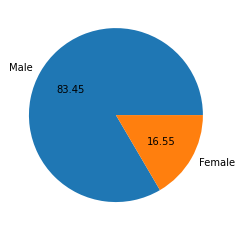

In [11]:
# Pie plot of students placement status
plt.pie(gender_df['Total Count'], labels=gender_df.index.to_list(), autopct='%.2f')
plt.show()

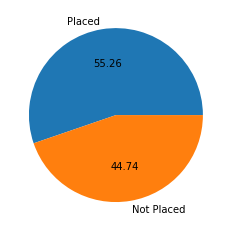

In [12]:
# Placement status percentage
plt.pie([placed_students['placedornot'].count(), not_placed_students['placedornot'].count()], labels=['Placed', 'Not Placed'], autopct='%.2f')
plt.show()

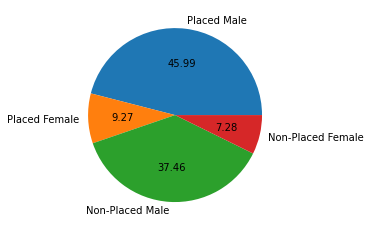

In [13]:
# Placement status percentage based on gender
plt.pie([placed_students[placed_students['gender'] == "Male"]['placedornot'].count(), placed_students[placed_students['gender'] == "Female"]['placedornot'].count(), not_placed_students[not_placed_students['gender'] == "Male"]['placedornot'].count(), not_placed_students[not_placed_students['gender'] == "Female"]['placedornot'].count()], labels=['Placed Male', 'Placed Female', 'Non-Placed Male', 'Non-Placed Female'], autopct='%.2f')
plt.show()

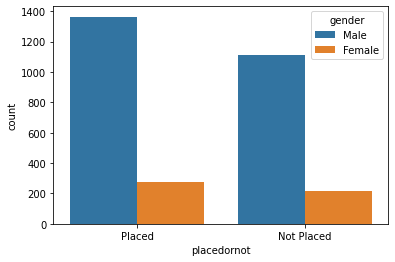

In [14]:
# Plotting the number of placed and non-placed students
sns.countplot(data= student_df, x = 'placedornot', orient= 'v', hue='gender')

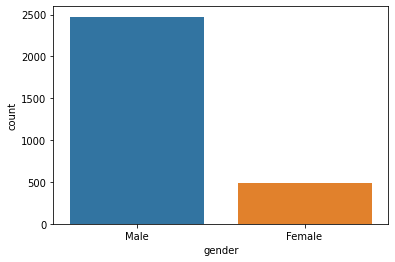

In [15]:
# Plotting the number of students based on gender 
sns.countplot(data= student_df, x = 'gender', orient='v')

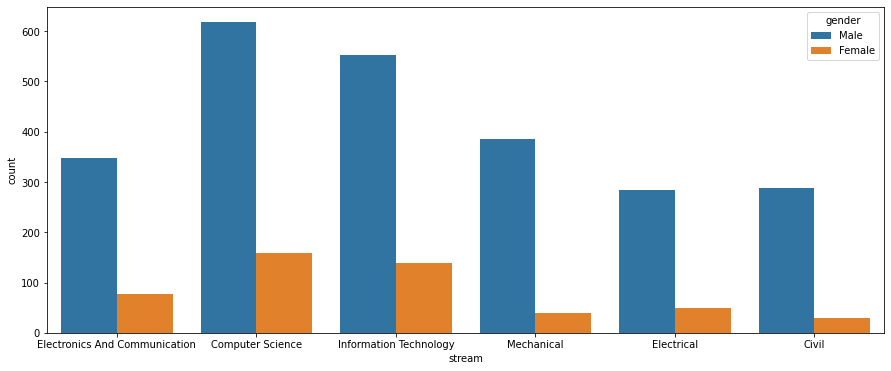

In [16]:
# Plotting the number of studenst based on stream and gender
sns.countplot(data= student_df, x = 'stream', orient='v', hue='gender')
plt.gcf().set_size_inches(15, 6)

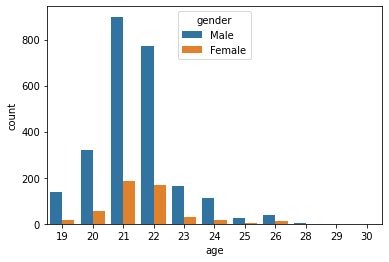

In [17]:
# Plotting the number of studenst based on age and gender
sns.countplot(data= student_df, x = 'age', orient= 'v', hue='gender')

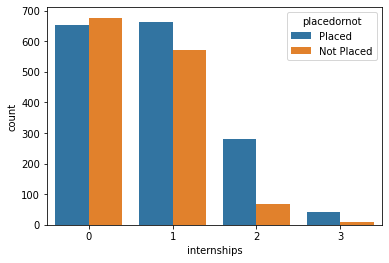

In [18]:
# Plotting the number of studenst based on the number of internships and placement status
sns.countplot(data= student_df, x = 'internships', orient= 'v', hue='placedornot')

<Figure size 7200x4800 with 0 Axes>

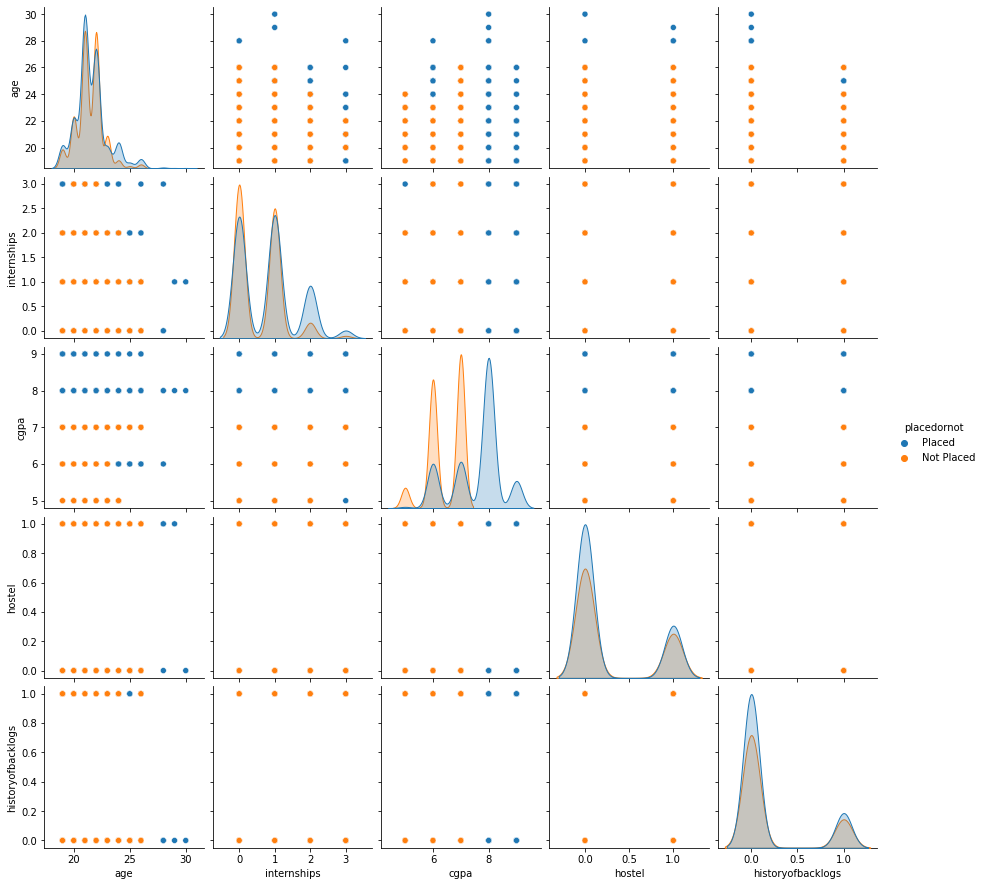

In [19]:
# Pair Plot
plt.figure(dpi = 1200)
sns.pairplot(data=student_df, hue='placedornot')

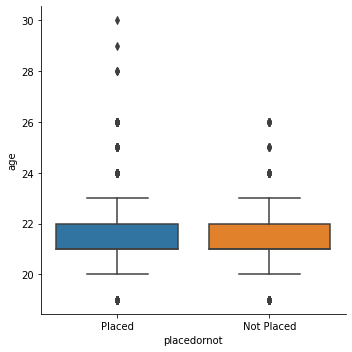

In [20]:
# Detecting outlier in age column
sns.catplot(x='placedornot', y = 'age', data=student_df, kind='box')

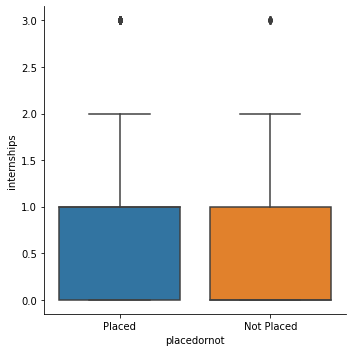

In [21]:
# Detecting outlier in stream column
sns.catplot(x='placedornot', y = 'internships', data=student_df, kind='box')

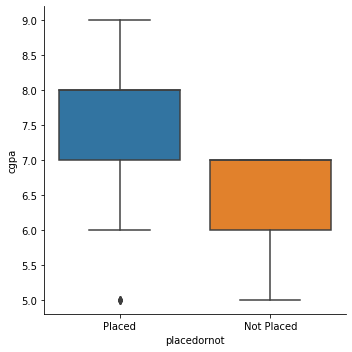

In [22]:
# Detecting outlier in hostel column
sns.catplot(x='placedornot', y = 'cgpa', data=student_df, kind='box')

In [23]:
# Drop 'id' column
student_records_df = student_records_df.drop('id', axis=1)

# Generate categorical variable list
cat_columns = student_records_df.dtypes[student_records_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(student_records_df[cat_columns].values.reshape(-2,2)))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_columns)

# Data that will be used for training and testing the machine learning model
ml_df = student_records_df.merge(encode_df,left_index=True,right_index=True).drop(cat_columns,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


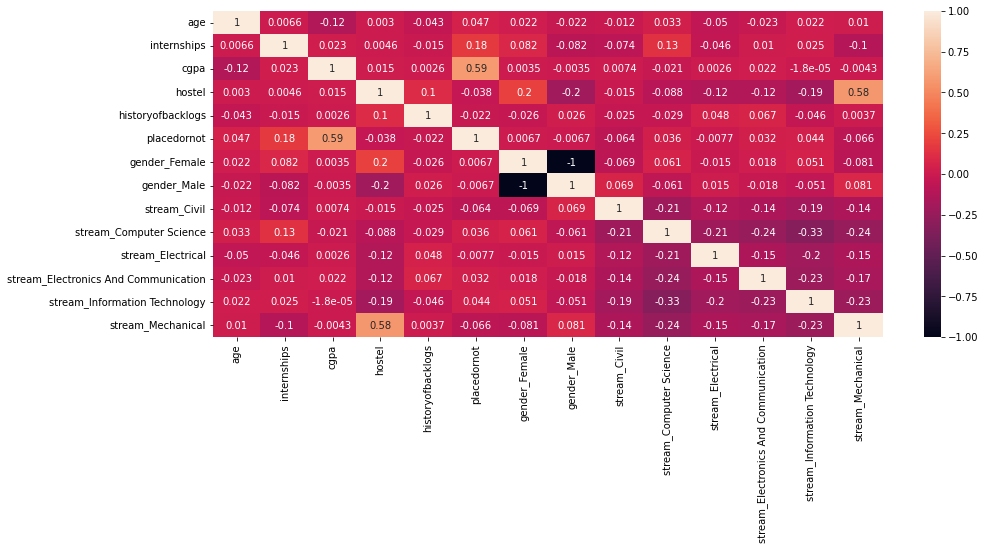

In [24]:
# Getting the relationship strength between variables
sns.heatmap(ml_df.corr(), annot=True)
plt.gcf().set_size_inches(15, 6)